In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from scipy.interpolate import griddata
import plotly.graph_objects as go

In [2]:
def Isosurface(x, y, z, values):
    fig = go.Figure(
        data=go.Isosurface(
            x=x.flatten(),
            y=y.flatten(),
            z=z.flatten(),
            value=values.flatten(),  # cdf_3d.flatten(),
            colorscale="magma",  #'BlueRed',
            isomin=0,
            isomax=1,
            surface_count=11,
            caps=dict(x_show=False, y_show=False, z_show=False),
        )
    )
    fig.update_layout(
        autosize=False,
        width=800,  # Adjust the width
        height=600,  # Adjust the height
        margin=dict(l=65, r=50, b=65, t=90),
    )
    fig.show()

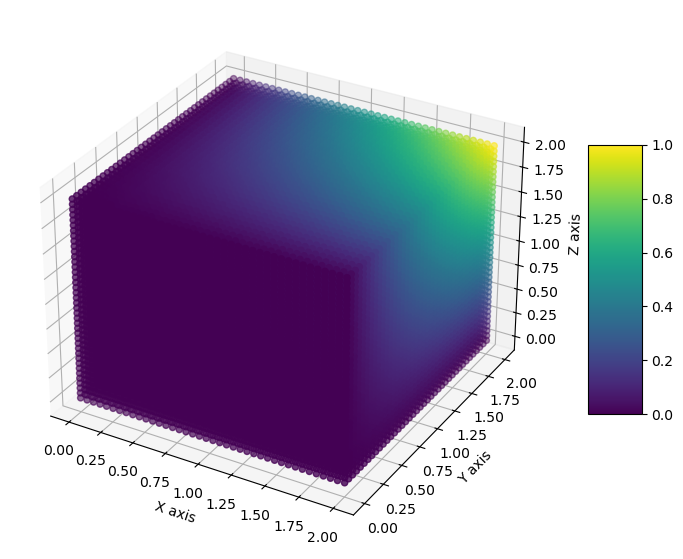

In [3]:
def f(x, y, z):
    return x * y * z / 2**3


# Create a grid of points
x = np.linspace(0, 2, 40)
y = np.linspace(0, 2, 40)
z = np.linspace(0, 2, 40)
x, y, z = np.meshgrid(x, y, z)

# Calculate the fourth dimension
d = f(x, y, z)

# Flatten the arrays for scatter plotting
x = x.flatten()
y = y.flatten()
z = z.flatten()
d = d.flatten()

# Normalize 'd' for coloring
d_normalized = (d - d.min()) / (d.max() - d.min())

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# 4D scatter plot with color representing the fourth dimension
scatter = ax.scatter(x, y, z, c=d, cmap="viridis")

# Add color bar which maps values to colors
color_bar = plt.colorbar(scatter, shrink=0.5, aspect=5)

# Set plot limits and labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")
plt.show()

In [4]:
# Generate some random data points
x = np.random.exponential(1, 1000) - 2  # np.random.normal(0, 1, 1000)
y = np.random.exponential(2, 1000) - 2
x = x[::-1]

In [5]:
# Generate some random data points
x = np.random.gamma(shape=2, scale=2, size=1000) - 3
y = np.random.gamma(shape=2, scale=2, size=1000) - 3

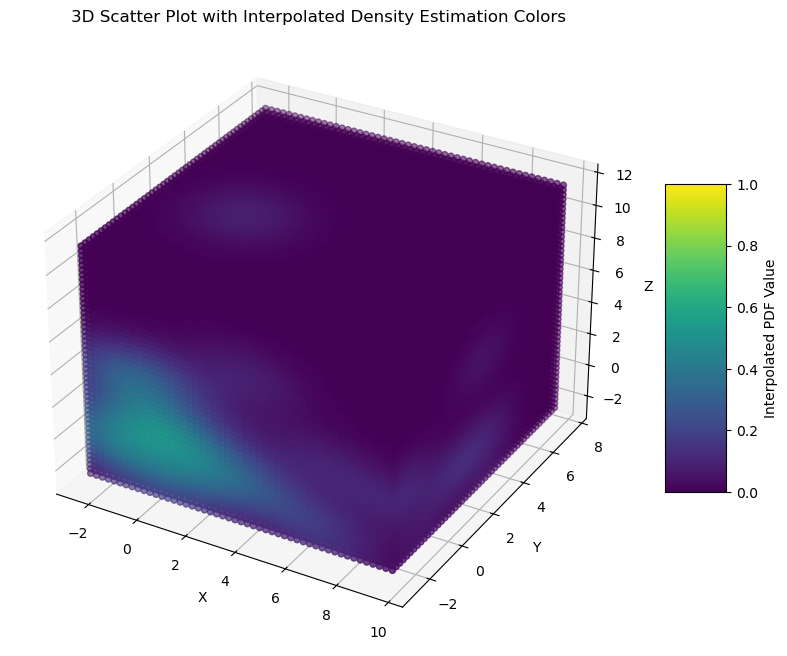

In [6]:
# Generate right-skewed 3D data using the gamma distribution
x = np.random.gamma(shape=2, scale=2, size=100) - 3
y = np.random.gamma(shape=2, scale=2, size=100) - 3
z = np.random.gamma(shape=2, scale=2, size=100) - 3
data = np.vstack([x, y, z])

# Perform Kernel Density Estimation with the right-skewed data
kde = gaussian_kde(data)

# Define a grid for evaluating the KDE in 3D
grid_size = 50
grid_x = np.linspace(x.min(), x.max(), grid_size)
grid_y = np.linspace(y.min(), y.max(), grid_size)
grid_z = np.linspace(z.min(), z.max(), grid_size)
grid_x, grid_y, grid_z = np.meshgrid(grid_x, grid_y, grid_z)

# Evaluate the KDE on the grid
grid_coords = np.vstack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()])
pdf_values = kde(grid_coords)

# Normalize the PDF values to scale the color mapping from 0 to 1
pdf_values_normalized = pdf_values / pdf_values.max()

# # Interpolate the normalized PDF values back to the original data points
# points = np.vstack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()]).T  # Meshgrid points
# values = pdf_values_normalized  # PDF values from meshgrid evaluation
# xi = np.vstack([x, y, z]).T  # Original data points

# # Use griddata to interpolate the KDE values back to the original data points
# pdf_values_interpolated = griddata(points, values, xi, method='linear')

# Plotting the scatter plot with interpolated PDF values for coloring
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Using interpolated PDF values for color mapping
scatter = ax.scatter(
    grid_x,
    grid_y,
    grid_z,
    c=pdf_values_normalized.reshape(grid_x.shape),
    cmap="viridis",
    marker="o",
)
# scatter = ax.scatter(x, y, z, c=pdf_values_interpolated, cmap='viridis', marker='o')

# Create a colorbar with the interpolated PDF values
cbar = plt.colorbar(scatter, shrink=0.5, aspect=5)
cbar.set_label("Interpolated PDF Value")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter Plot with Interpolated Density Estimation Colors")

plt.show()

In [ ]:
def f(x, y, z):
    return x * y * z / 2**3


# x = np.linspace(0, 2, 40)
# y = np.linspace(0, 2, 40)
# z = np.linspace(0, 2, 40)
# x, y, z = np.meshgrid(x, y, z)

x, y, z = np.mgrid[0:2:40j, 0:2:40j, 0:2:40j]
values = f(x, y, z)
Isosurface(x, y, z, values)

In [ ]:
x = np.random.gamma(shape=2, scale=2, size=100) - 3

In [ ]:
x.min(), x.max(), x.mean(), x.std()

In [ ]:
def resize(x, y, z):
    x = (x - x.min()) * 2 / (x.max() - x.min())
    y = (y - y.min()) * 2 / (y.max() - y.min())
    z = (z - z.min()) * 2 / (z.max() - z.min())
    return x, y, z


def f(x, y, z):
    return x * y * z / 2**3


x = np.random.gamma(shape=2, scale=2, size=100) - 3
y = np.random.gamma(shape=2, scale=2, size=100) - 3
z = np.random.gamma(shape=2, scale=2, size=100) - 3
x, y, z = resize(x, y, z)
x, y, z = np.meshgrid(x, y, z)

# x, y, z = np.mgrid[0:2:40j, 0:2:40j, 0:2:40j]

values = f(x, y, z)

fig = go.Figure(
    data=go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=values.flatten(),
        colorscale="magma",  #'BlueRed',
        isomin=0.1,
        isomax=0.9,
        surface_count=9,
        caps=dict(x_show=False, y_show=False, z_show=False),
    )
)

fig.update_layout(
    autosize=False,
    width=800,  # Adjust the width
    height=600,  # Adjust the height
    margin=dict(l=65, r=50, b=65, t=90),
)

fig.show()

In [ ]:
values.min(), values.max(), values.mean(), values.std()

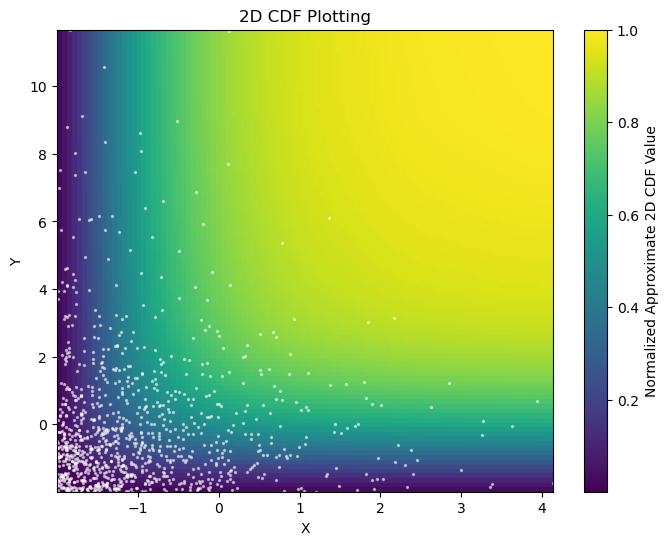

In [16]:
x = np.random.exponential(1, 1000) - 2
y = np.random.exponential(2, 1000) - 2
true_CDF_values = true_CDF_2D(x, y)
plotting_CDF(true_CDF_values, x, y)

In [ ]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
CDF_2D(x, y)

In [ ]:
x = np.random.uniform(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
CDF_2D(x, y)

In [ ]:
def CDF_3D(x, y, z, plotting=True):
    data = np.vstack([x, y, z])

    # Perform Kernel Density Estimation
    kde = gaussian_kde(data)

    # Create a grid of values to evaluate the KDE over
    grid_x = np.linspace(x.min(), x.max(), 50)
    grid_y = np.linspace(y.min(), y.max(), 50)
    grid_z = np.linspace(z.min(), z.max(), 50)
    grid_x, grid_y, grid_z = np.meshgrid(grid_x, grid_y, grid_z)

    # Evaluate the KDE on the grid
    pdf_values = kde(np.vstack([grid_x.ravel(), grid_y.ravel(), grid_z.ravel()]))

    # Reshape the result back to the grid shape
    pdf_values_reshaped = pdf_values.reshape(grid_x.shape)

    # Normalize the PDF values (this is optional and for visualization purposes)
    pdf_values_normalized = pdf_values_reshaped / pdf_values_reshaped.max()

    # Approximate the 2D CDF by cumulatively summing the normalized PDF values across both dimensions
    cdf_3d = np.cumsum(np.cumsum(np.cumsum(pdf_values_normalized, axis=0), axis=1), axis=2)

    # Normalize the approximate 2D CDF so the maximum value is 1
    cdf_3d_normalized = cdf_3d / cdf_3d.max()

    # print(grid_x.shape, grid_y.shape, grid_z.shape, cdf_3d_normalized.shape)
    if plotting:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection="3d")
        # 4D scatter plot with color representing the fourth dimension
        scatter = ax.scatter(grid_x, grid_y, grid_z, c=cdf_3d_normalized, cmap="viridis")
        plt.colorbar(scatter, shrink=0.5, aspect=5, label="Normalized Approximate 3D CDF Value")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.title("3D CDF Plotting")
        plt.show()
    return grid_x, grid_y, grid_z, cdf_3d_normalized

In [ ]:
x = np.random.uniform(0, 1, 50)
y = np.random.normal(0, 1, 50)
z = np.random.exponential(2, 50) - 2
grid_x, grid_y, grid_z, cdf_3d = CDF_3D(x, y, z)

In [ ]:
Isosurface(grid_x, grid_y, grid_z, cdf_3d)

In [ ]:
def f(x, y, z):
    return x * y * z / 2**3


# Create a grid of points
x = np.linspace(0, 2, 40)
y = np.linspace(0, 2, 40)
z = np.linspace(0, 2, 40)
x, y, z = np.meshgrid(x, y, z)

# Calculate the fourth dimension
cdf = f(x, y, z)

print(x.shape, y.shape, z.shape, cdf.shape)

# Flatten the arrays for scatter plotting
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()
cdf_flat = cdf.flatten()
# Normalize 'd' for coloring
cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min())

print(x_flat.shape, y_flat.shape, z_flat.shape, cdf_flat.shape)

# Assuming 'grid_x', 'grid_y', 'grid_z', and 'cdf_3d_normalized' are defined and prepared
# Convert grid points and CDF values into 1D arrays for Plotly
# x_flat = grid_x.flatten()
# y_flat = grid_y.flatten()
# z_flat = grid_z.flatten()
# cdf_flat = cdf_3d.flatten()  # Make sure cdf_3d_normalized is a 3D array normalized from 0 to 1

# Create a Plotly figure
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x_flat,
            y=y_flat,
            z=z_flat,
            mode="markers",
            marker=dict(
                size=2,
                color=cdf_flat,  # Use CDF values for color
                colorscale="Viridis",  # Specify the colorscale
                colorbar=dict(title="Normalized Approx. 3D CDF Value"),
                opacity=0.8,
            ),
        )
    ]
)

# Update the layout
fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"), title="3D CDF Plotting"
)

# Show the figure
fig.show()
# fig.write_html("output.html", auto_open=True)

In [ ]:
# print(x.shape, y.shape, z.shape, d.shape)


# d_normalized = (d - d.min()) / (d.max() - d.min())


# Assuming 'grid_x', 'grid_y', 'grid_z', and 'cdf_3d_normalized' are defined and prepared
# Convert grid points and CDF values into 1D arrays for Plotly
x_flat = grid_x.flatten()
y_flat = grid_y.flatten()
z_flat = grid_z.flatten()
cdf_flat = cdf_3d.flatten()  # Make sure cdf_3d_normalized is a 3D array normalized from 0 to 1

# print(x_flat.shape, y_flat.shape, z_flat.shape, cdf_flat.shape)

# Create a Plotly figure
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x_flat,
            y=y_flat,
            z=z_flat,
            mode="markers",
            marker=dict(
                size=2,
                color=cdf_flat,  # Use CDF values for color
                colorscale="Viridis",  # Specify the colorscale
                colorbar=dict(title="Normalized Approx. 3D CDF Value"),
                opacity=0.8,
            ),
        )
    ]
)

# Update the layout
fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"), title="3D CDF Plotting"
)

# Show the figure
fig.show()
# fig.write_html("output.html", auto_open=True)

In [ ]:
def Isosurface_with_3d_scatter(x, y, z, values):
    trace1 = go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=values.flatten(),  # cdf_3d.flatten(),
        colorscale="magma",  #'BlueRed',
        isomin=0,
        isomax=1,
        surface_count=11,
        caps=dict(x_show=False, y_show=False, z_show=False),
    )
    trace2 = go.Scatter3d(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        mode="markers",
        marker=dict(
            size=2,
            color=values.flatten(),  # Use CDF values for color
            colorscale="Viridis",  # Specify the colorscale
            colorbar=dict(title="Normalized Approx. 3D CDF Value"),
            opacity=0.8,
        ),
    )
    fig = go.Figure(data=[trace1, trace2])
    fig.update_layout(
        autosize=False,
        width=800,  # Adjust the width
        height=600,  # Adjust the height
        margin=dict(l=65, r=50, b=65, t=90),
    )
    fig.show()

In [ ]:
Isosurface_with_3d_scatter(grid_x, grid_y, grid_z, cdf_3d)

## 一个比较复杂的分布

### Generate Random Data Points

In [270]:
def f(x, y, type=1):
    if type == 1:
        return np.sin(x) / np.cos(y) ** 2
    elif type == 2:
        return np.sin(x) * np.cos(y)
    elif type == 3:
        return np.sin(x**2 + y**2)


def condition(values, type=1):
    if type == 1:
        return (values > 0.95) | (values < -0.95)
    elif type == 2:
        return (values > 0.7) | (values < -0.7)
    elif type == 3:
        return (0.5 < values) & (values < 0.9)


def generate_data(f_type, cond_type, lims=[0, 2 * np.pi, 0, 2 * np.pi], num_points=1000):
    x_min, x_max, y_min, y_max = lims
    x = np.linspace(x_min, x_max, num_points)
    y = np.linspace(y_min, y_max, num_points)
    values = np.array([[f(xi, yi, type=f_type) for xi in x] for yi in y])
    indices = np.where(condition(values, type=cond_type))
    x = x[indices[0]]
    y = y[indices[1]]
    return x, y

### Calculte True PDF and CDF

In [271]:
def generate_meshgrid(x, y, lims, method, bins=[50, 50]):
    if method == "percentile":  # 取出百分比数量的数据点
        uniques_number = np.array([np.unique(x).shape[0], np.unique(y).shape[0]])
        bins *= uniques_number / 100
        bins = bins.astype(int)
        x_edges = np.append(
            x[np.random.choice(len(x), size=bins[0], replace=False)], [lims[0], lims[1]]
        )
        y_edges = np.append(
            y[np.random.choice(len(y), size=bins[1], replace=False)], [lims[2], lims[3]]
        )
    elif method == "dynamic":
        x_edges = np.quantile(x, np.linspace(0, 1, bins[0] + 1))
        y_edges = np.quantile(y, np.linspace(0, 1, bins[1] + 1))
    elif method == "uniform":
        x_edges = np.linspace(lims[0], lims[1] + 0.01, bins[0] + 1)
        y_edges = np.linspace(lims[2], lims[3] + 0.01, bins[1] + 1)
    return np.unique(x_edges), np.unique(y_edges)

In [ ]:
def calc_true_pdf_2d(x, y, x_edges, y_edges):
    true_pdf, _, _ = np.histogram2d(x, y, bins=[x_edges, y_edges], density=False)
    return true_pdf.T / x.shape[0]

In [ ]:
def calc_true_cdf_2d(true_pdf):
    true_cdf = np.cumsum(np.cumsum(true_pdf, axis=0), axis=1)
    true_cdf /= true_cdf.max()
    return true_cdf

### Plotting

In [272]:
def plot_distributions_2d(x, y, lims, true_pdf, true_cdf):
    fig, ax = plt.subplots(2, 3, figsize=(12, 8))
    # data points scatter
    ax[0, 0].scatter(x, y, color="green", s=1)
    ax[0, 0].set_title("distribution of points")
    ax[0, 0].set_xlim(lims[0], lims[1])
    ax[0, 0].set_ylim(lims[2], lims[3])
    ax[0, 0].set_xlabel("X")
    ax[0, 0].set_ylabel("Y")
    # true PDF
    sc1 = ax[0, 1].imshow(true_pdf, origin="lower", cmap="magma", aspect="auto", extent=lims)
    cbar1 = fig.colorbar(sc1, ax=ax[0, 1])
    cbar1.set_label("Probability Density")
    # ax[0, 1].scatter(x, y, s=1, color='white', alpha=0.5)
    ax[0, 1].set_title("True PDF With Uniform Meshgrid")
    ax[0, 1].set_xlim(lims[0], lims[1])
    ax[0, 1].set_ylim(lims[2], lims[3])
    ax[0, 1].set_xlabel("X")
    ax[0, 1].set_ylabel("Y")
    # True CDF
    sc2 = ax[0, 2].imshow(true_cdf, origin="lower", extent=lims, aspect="auto", cmap="viridis")
    cbar2 = fig.colorbar(sc2, ax=ax[0, 2])
    cbar2.set_label("Cumulative Distribution")
    # ax[0, 2].scatter(x, y, s=1, color='white', alpha=0.5)
    ax[0, 2].set_title("True CDF")
    ax[0, 2].set_xlim(lims[0], lims[1])
    ax[0, 2].set_ylim(lims[2], lims[3])
    ax[0, 2].set_xlabel("X")
    ax[0, 2].set_ylabel("Y")
    # Model learned CDF

    # Model generated PDF

    plt.tight_layout()
    plt.show()

In [273]:
lims = [0, 2 * np.pi, 0, 2 * np.pi]
num_points = 100
meshgrid_bins = [200, 200]

In [13]:
data = pd.DataFrame(
    {
        "col1": [1, 1, 1],
        "col2": [2, 2, 2],
    }
)

In [15]:
cols = [data[c] for c in data.columns]

2

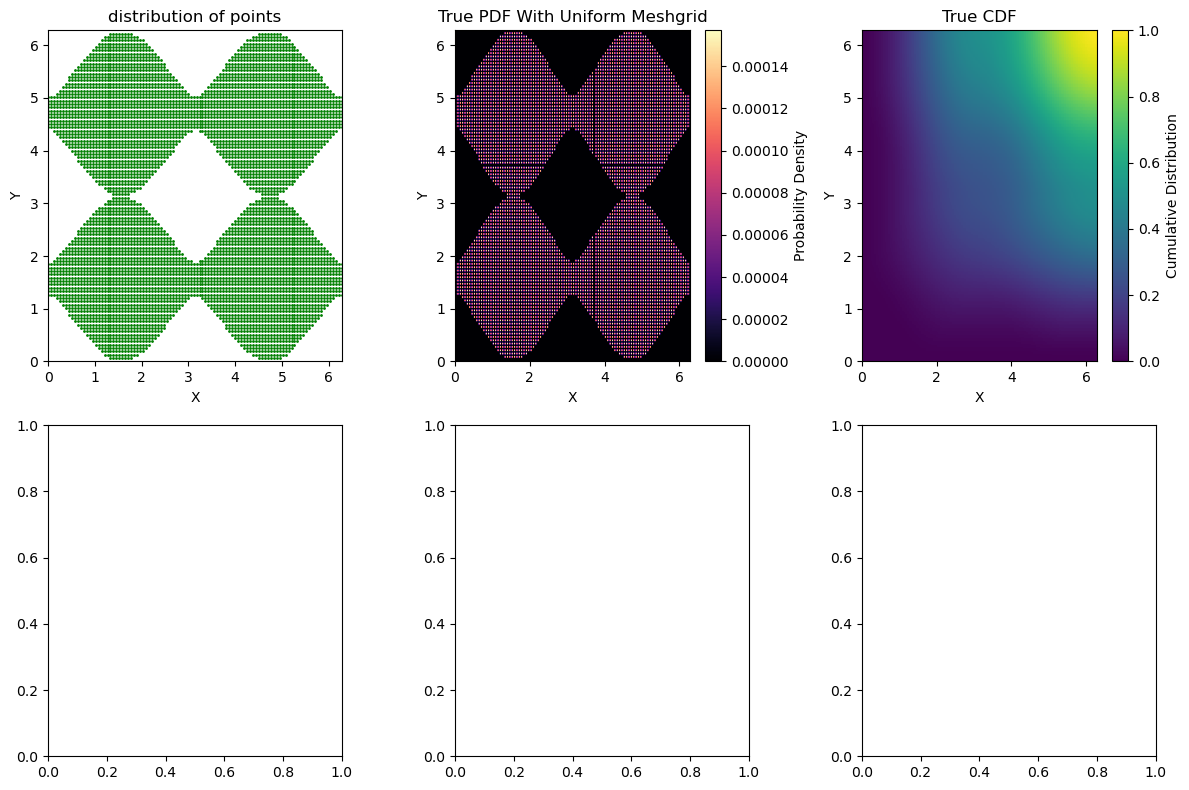

In [274]:
x, y = generate_data(f_type=1, cond_type=1, lims=lims, num_points=num_points)
x_edges, y_edges = generate_meshgrid(x, y, lims, method="uniform", bins=meshgrid_bins)
true_pdf = calc_true_pdf_2d(x, y, x_edges, y_edges)
true_cdf = calc_true_cdf_2d(true_pdf)
plot_distributions_2d(x, y, lims, true_pdf, true_cdf)

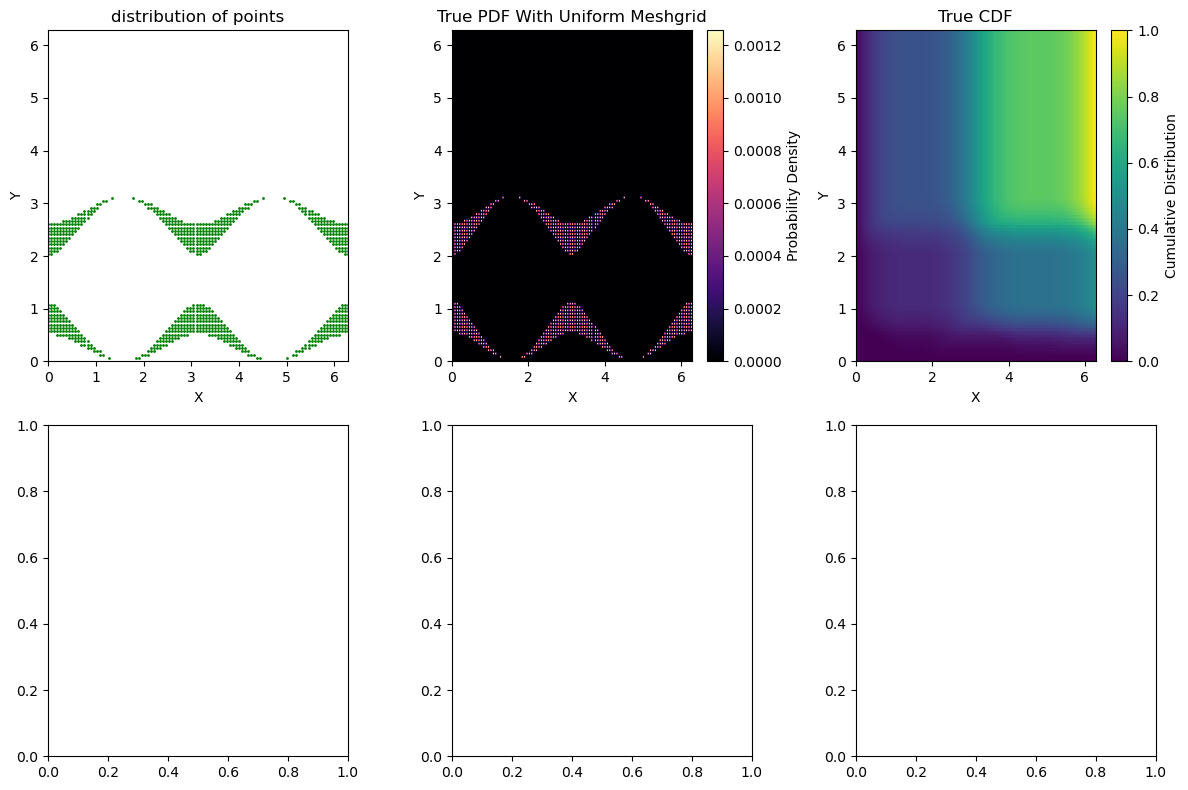

In [275]:
x, y = generate_data(f_type=1, cond_type=3, lims=lims, num_points=num_points)
x_edges, y_edges = generate_meshgrid(x, y, lims, method="uniform", bins=meshgrid_bins)
true_pdf = calc_true_pdf_2d(x, y, x_edges, y_edges)
true_cdf = calc_true_cdf_2d(true_pdf)
plot_distributions_2d(x, y, lims, true_pdf, true_cdf)

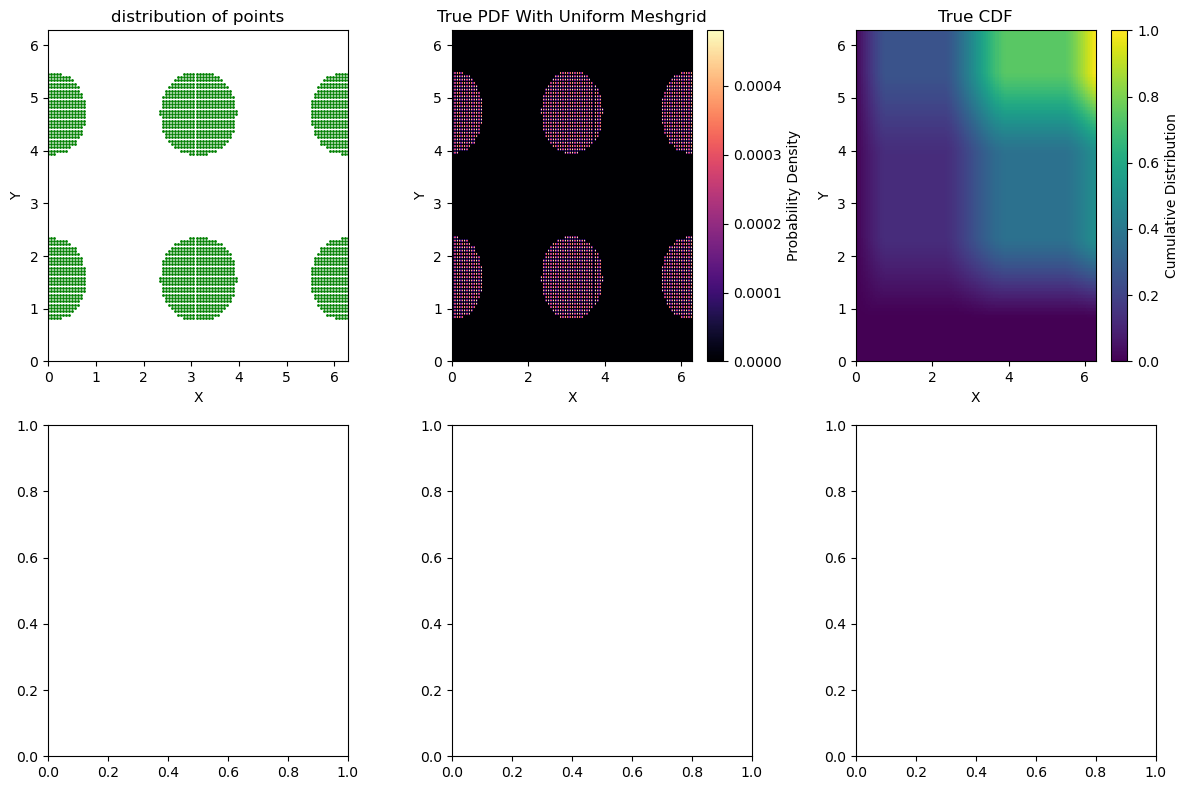

In [276]:
x, y = generate_data(f_type=2, cond_type=2, lims=lims, num_points=num_points)
x_edges, y_edges = generate_meshgrid(x, y, lims, method="uniform", bins=meshgrid_bins)
true_pdf = calc_true_pdf_2d(x, y, x_edges, y_edges)
true_cdf = calc_true_cdf_2d(true_pdf)
plot_distributions_2d(x, y, lims, true_pdf, true_cdf)

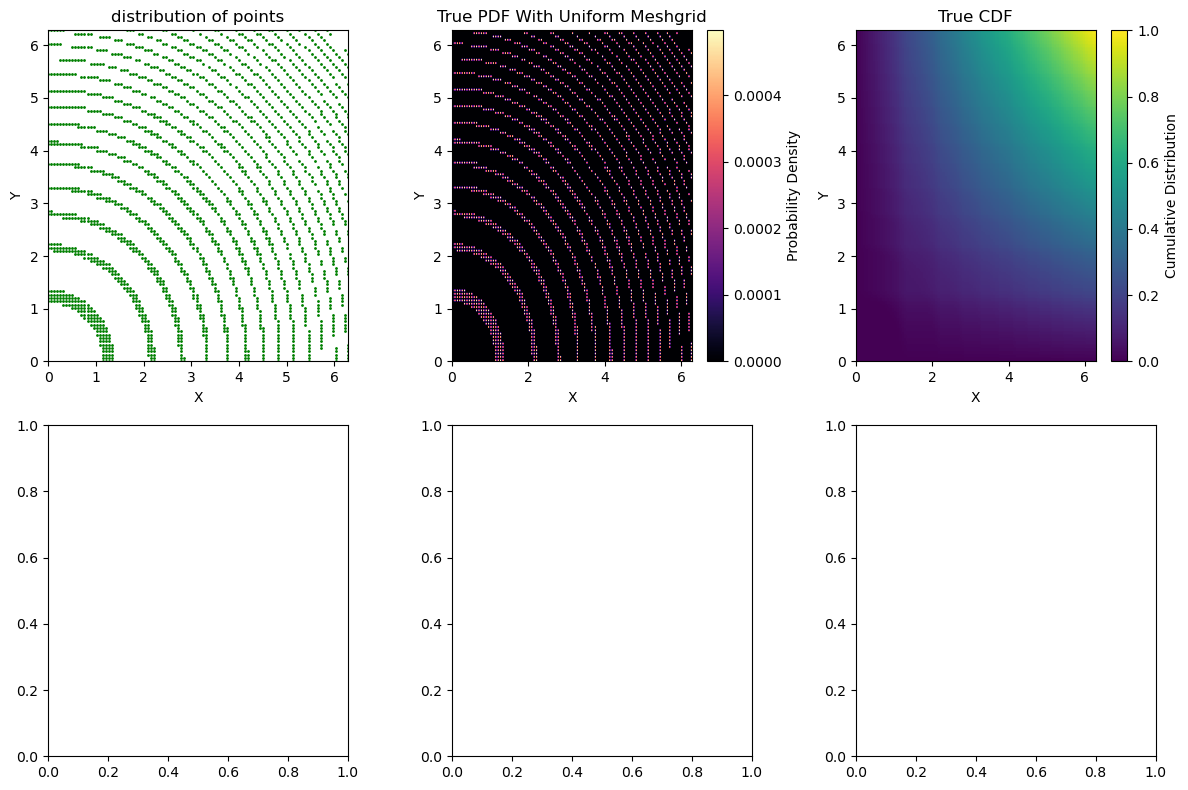

In [277]:
x, y = generate_data(f_type=3, cond_type=1, lims=lims, num_points=num_points)
x_edges, y_edges = generate_meshgrid(x, y, lims, method="uniform", bins=meshgrid_bins)
true_pdf = calc_true_pdf_2d(x, y, x_edges, y_edges)
true_cdf = calc_true_cdf_2d(true_pdf)
plot_distributions_2d(x, y, lims, true_pdf, true_cdf)

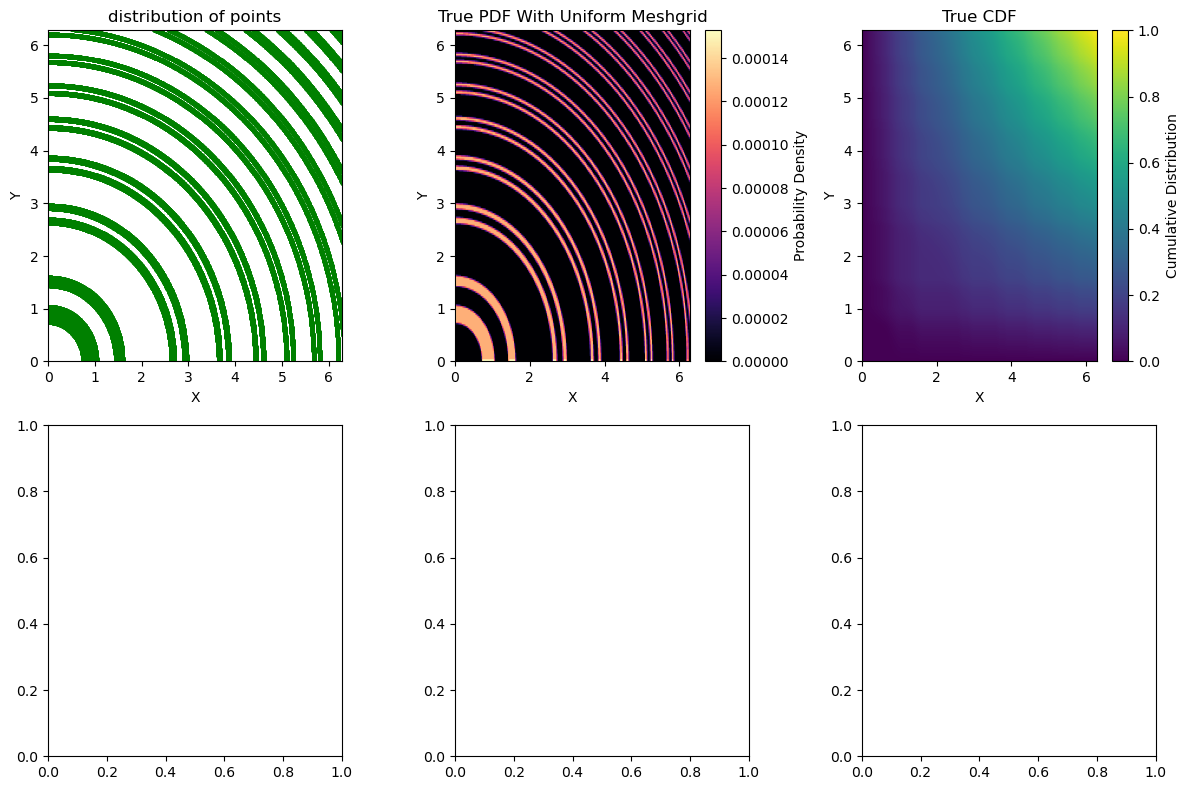

In [278]:
x, y = generate_data(f_type=3, cond_type=3)
x_edges, y_edges = generate_meshgrid(x, y, lims, method="uniform", bins=meshgrid_bins)
true_pdf = calc_true_pdf_2d(x, y, x_edges, y_edges)
true_cdf = calc_true_cdf_2d(true_pdf)
plot_distributions_2d(x, y, lims, true_pdf, true_cdf)

In [ ]:
# 由于 KDE 方法太粗糙，下面采用网格精确计算 PDF

In [2]:
data = np.random.rand(100, 2)
grid_size = (100, 100)

In [9]:
%%time
def calculate_2d_pdf(data, grid_size):
    x, y = data[:, 0], data[:, 1]
    x_edges = np.unique(x)
    y_edges = np.unique(y)

    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[x_edges, y_edges], density=False)
    return hist

result3 = calculate_2d_pdf(data, grid_size)
result3.sum()

CPU times: user 755 µs, sys: 544 µs, total: 1.3 ms
Wall time: 949 µs


100.0

In [8]:
%%time
def calculate_2d_pdf(data, grid_size):
    x, y = data[:, 0], data[:, 1]
    x_min, x_max = np.min(data[:, 0]), np.max(data[:, 0])
    y_min, y_max = np.min(data[:, 1]), np.max(data[:, 1])
    x_edges = np.linspace(x_min, x_max + 0.01, grid_size[0] + 1)
    y_edges = np.linspace(y_min, y_max + 0.01, grid_size[1] + 1)

    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[x_edges, y_edges], density=False)
    return hist

result4 = calculate_2d_pdf(data, grid_size)
result4

CPU times: user 605 µs, sys: 533 µs, total: 1.14 ms
Wall time: 750 µs


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
## 这里实验成功，可以用 自己的网格meshgrid方法，来计算2D PDF，替代kernel density estimation方法，准确度更高，速度更快

### 实验不用的网格划分方法的效果，meshgrid

In [174]:
x = np.random.exponential(1, 1000) - 2
y = np.random.exponential(2, 1000) - 2

In [175]:
def calc_true_pdf_2d(x, y, x_edges, y_edges):
    true_pdf, _, _ = np.histogram2d(x, y, bins=[x_edges, y_edges], density=False)
    return true_pdf.T

In [176]:
def generate_meshgrid(x, y, method, bins=[50, 50]):
    lims = [x.min(), x.max(), y.min(), y.max()]
    if method == "percentile":  # 取出百分比数量的数据点
        uniques_number = np.array([np.unique(x).shape[0], np.unique(y).shape[0]])
        bins *= uniques_number / 100
        bins = bins.astype(int)
        x_edges = np.append(
            x[np.random.choice(len(x), size=bins[0], replace=False)], [lims[0], lims[1]]
        )
        y_edges = np.append(
            y[np.random.choice(len(y), size=bins[1], replace=False)], [lims[2], lims[3]]
        )
    elif method == "dynamic":
        x_edges = np.quantile(x, np.linspace(0, 1, bins[0] + 1))
        y_edges = np.quantile(y, np.linspace(0, 1, bins[1] + 1))
    elif method == "uniform":
        x_edges = np.linspace(lims[0], lims[1] + 0.01, bins[0] + 1)
        y_edges = np.linspace(lims[2], lims[3] + 0.01, bins[1] + 1)
    return np.unique(x_edges), np.unique(y_edges), lims

In [177]:
def experiment(method, bins=[50, 50]):
    x_edges, y_edges, lims = generate_meshgrid(x, y, method=method, bins=bins)
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5, label="Data points", s=15)
    for x_edge in x_edges:
        plt.vlines(
            x_edge,
            ymin=min(y_edges),
            ymax=max(y_edges),
            colors="r",
            linestyles="dashed",
            linewidth=1,
        )
    for y_edge in y_edges:
        plt.hlines(
            y_edge,
            xmin=min(x_edges),
            xmax=max(x_edges),
            colors="b",
            linestyles="dashed",
            linewidth=1,
        )
    plt.show()
    print(f"method: {method}, bins: {bins}")
    print(f"区间数量{x_edges.shape[0] * y_edges.shape[0]}")
    result = calc_true_pdf_2d(x, y, x_edges, y_edges)
    print(f"每个区间里的数据点数量的最大值{result.max()}")
    print(f"非零区间数量{np.count_nonzero(result)}")

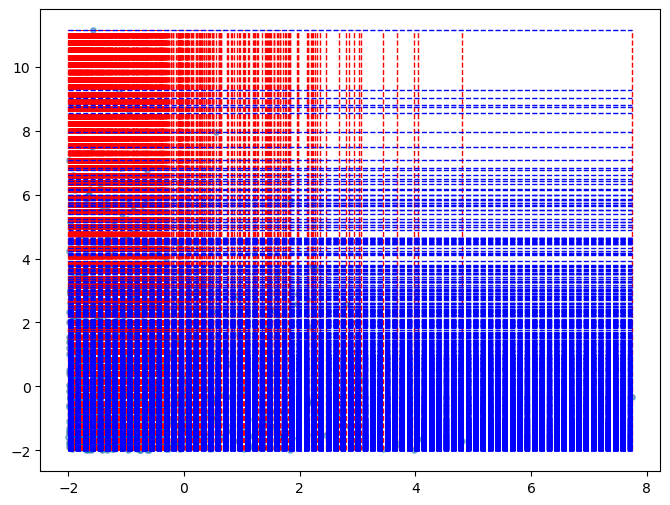

method: percentile, bins: [100, 100]
区间数量1000000
每个区间里的数据点数量的最大值1.0
非零区间数量1000


In [178]:
experiment(
    "percentile", bins=[100, 100]
)  # 100% 代表使用所有的 unique 值，把所有数据点作为一个区间，每个区间里只有一个数据点

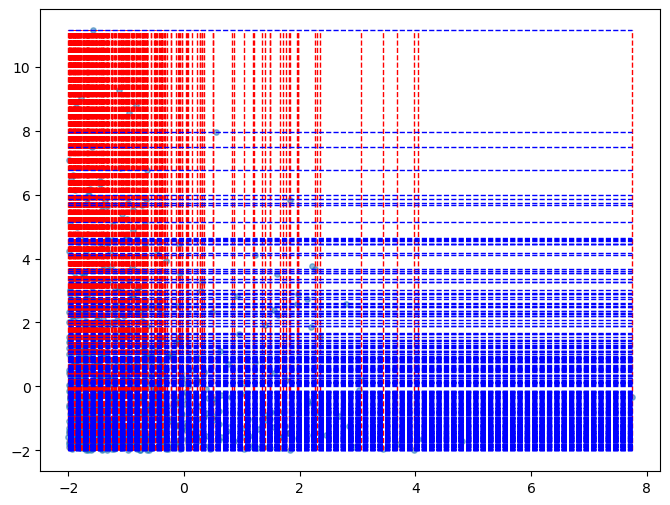

method: percentile, bins: [30, 30]
区间数量90300
每个区间里的数据点数量的最大值2.0
非零区间数量993


In [179]:
experiment("percentile", bins=[30, 30])  # 这是把每个维度上各取 30% 个数据点组成区间
# 这是一种非常密集的方法，因为 1000 个数据点 * 30% 的话，仍然有 300 个数据点，总共有 300 * 300 = 90000 个区间
# 而用 dynamic 方法 每个维度取 30 个分位数的话，每个维度只有 30 个点，总共有 30 * 30 = 900 个区间

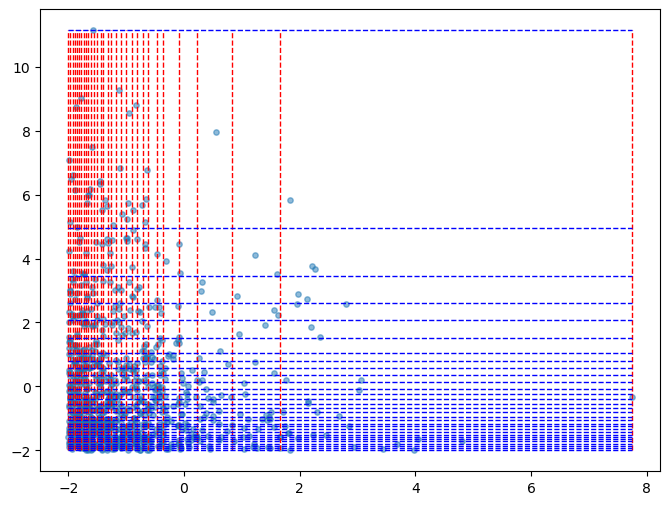

method: dynamic, bins: [30, 30]
区间数量961
每个区间里的数据点数量的最大值6.0
非零区间数量608


In [182]:
experiment("dynamic", bins=[30, 30])  # 用分位数能极大的减少区间数量。
# 要注意非零区间数量，类似于 L2 正则化

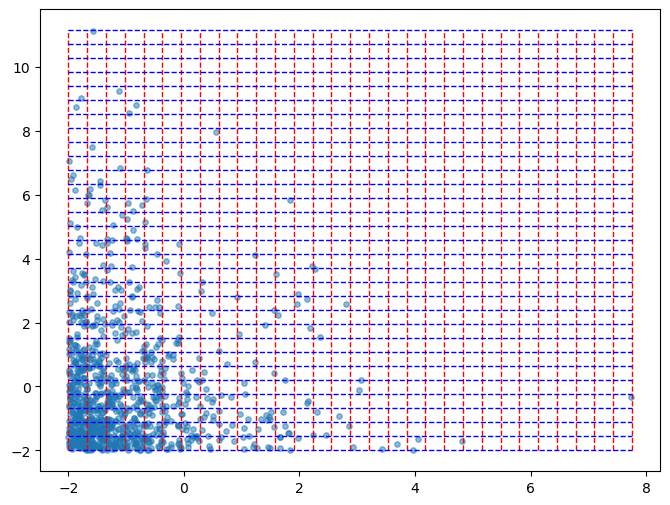

method: uniform, bins: [30, 30]
区间数量961
每个区间里的数据点数量的最大值53.0
非零区间数量172


In [183]:
experiment("uniform", bins=[30, 30])
# 和 dynamic 方法相比，uniform 方法的区间数量是固定的，不会因为数据点的分布而变化
# 但是 uniform 方法的非零区间数量会更少，每个区间的数据点数量更多，意味着更稀疏，类似于 L0 正则化

### 实验：度量两个概率分布之间的相似度：KL 散度、交叉熵、余弦相似度

In [ ]:
# 最小化 KL(q‖p) 等价于最小化一个负对数似然，这样的做法在我们训练一个分类器时很常见。例如，对于变分自编码器来说，我们希望后验分布能够接近于某种先验分布，这也是我们通过最小化它们之间的 KL 散度来实现的。

In [ ]:
import torch.nn.functional as F

# 这里是为了让每个x,y 的总和为1， x、y：array-like，shape=(n_samples,)，1D array of probabilities
# 这里 y 是真实分布，x是拟合分布
kl = F.kl_div(x.softmax(dim=-1).log(), y.softmax(dim=-1), reduction="sum")

In [ ]:
if x.sum() == 1 and y.sum() == 1:
    kl = F.kl_div(x.log(), y, reduction="sum")  # 用均值也行，"mean"

In [ ]:
# 在分类任务中，我们经常采用的是交叉熵损失函数。在分类任务中我们常常需要计算不同类别的概率值，所以交叉熵可以用来衡量两个概率分布之间的差异，交叉熵值越低说明两个概率分布越接近。

In [ ]:
# 相对熵 (Relative Entropy)：又称 KL 散度 (Kullback-Leibler Divergence, KLD)，用于衡量两个概率分布之间的差异 (或者说距离)。注意，虽然 KL 散度可以衡量两个分布之间的距离，但它本身并不是一个距离函数，因为距离函数具有对称性，而相对熵不具备这种对称性。其中，P是数据的真实分布，Q是模型拟合的分布，二者定义在相同的概率空间上。我们需要用拟合分布 Q 去逼近真实分布 P。

In [ ]:
# SNE的目标是让低维分布去拟合高维分布，则目标是令两个分布一致。两个分布的一致程度可以使用相对熵（Mutual entropy，也叫做KL散度，Kullback-Leibler divergences，KLD）来衡量，可以以此定义代价函数（cost function）：